/tmp/ipykernel_15305/515339432.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


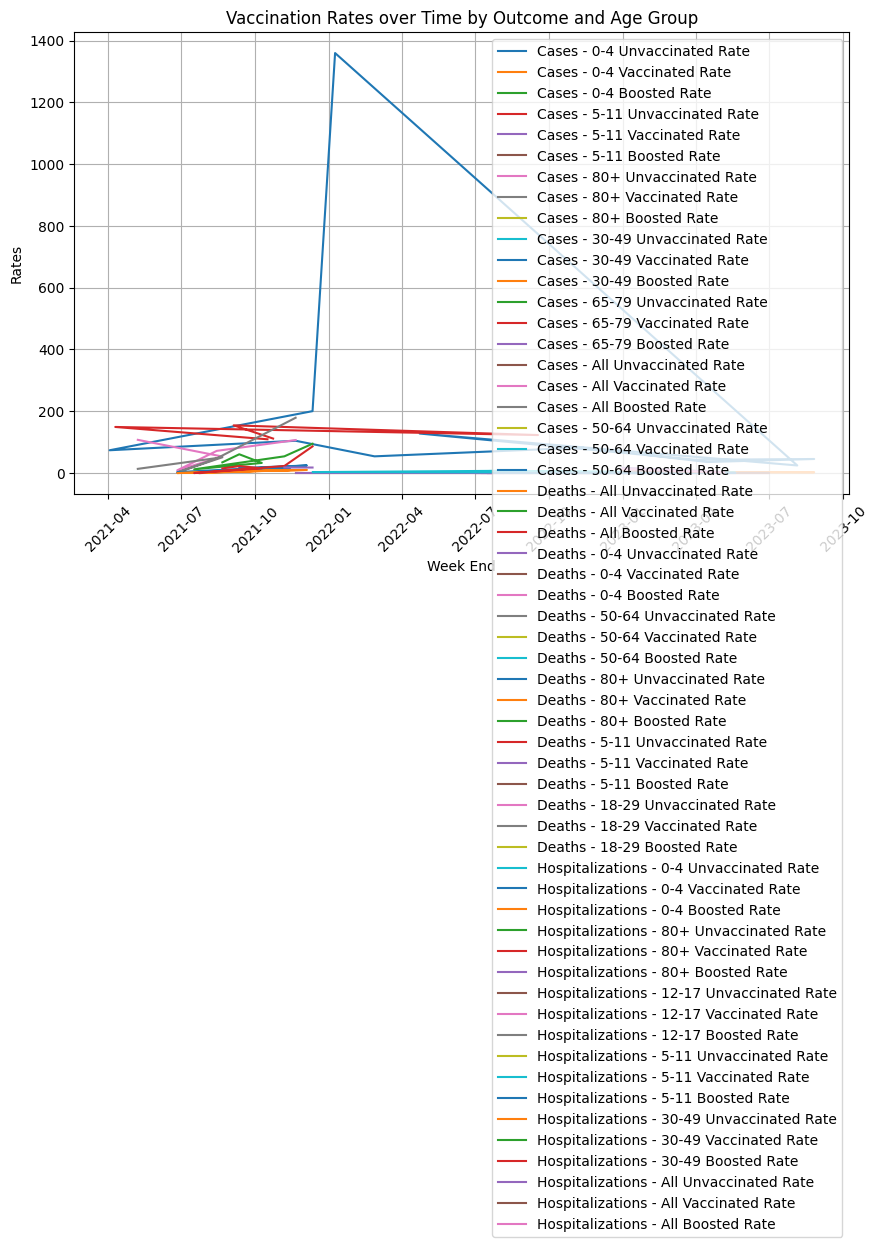

/tmp/ipykernel_15305/515339432.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


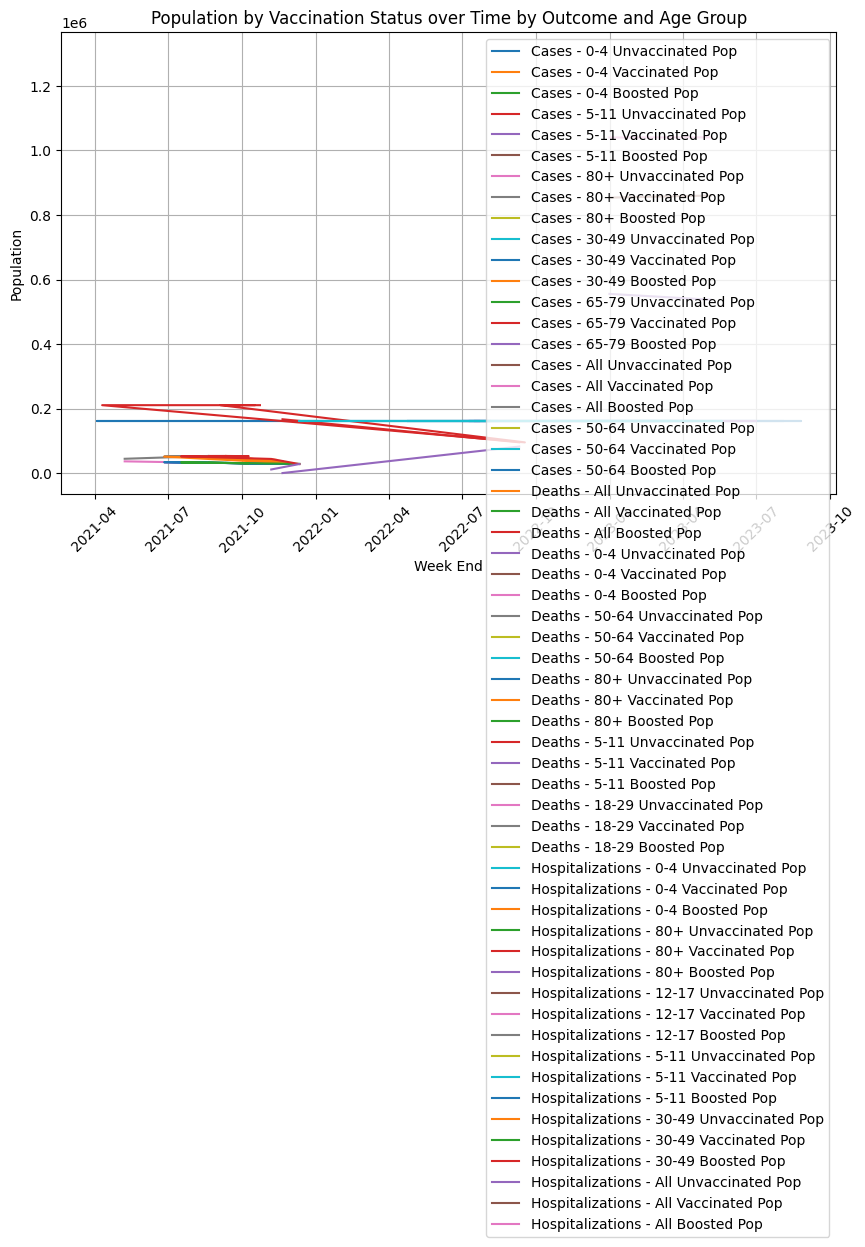

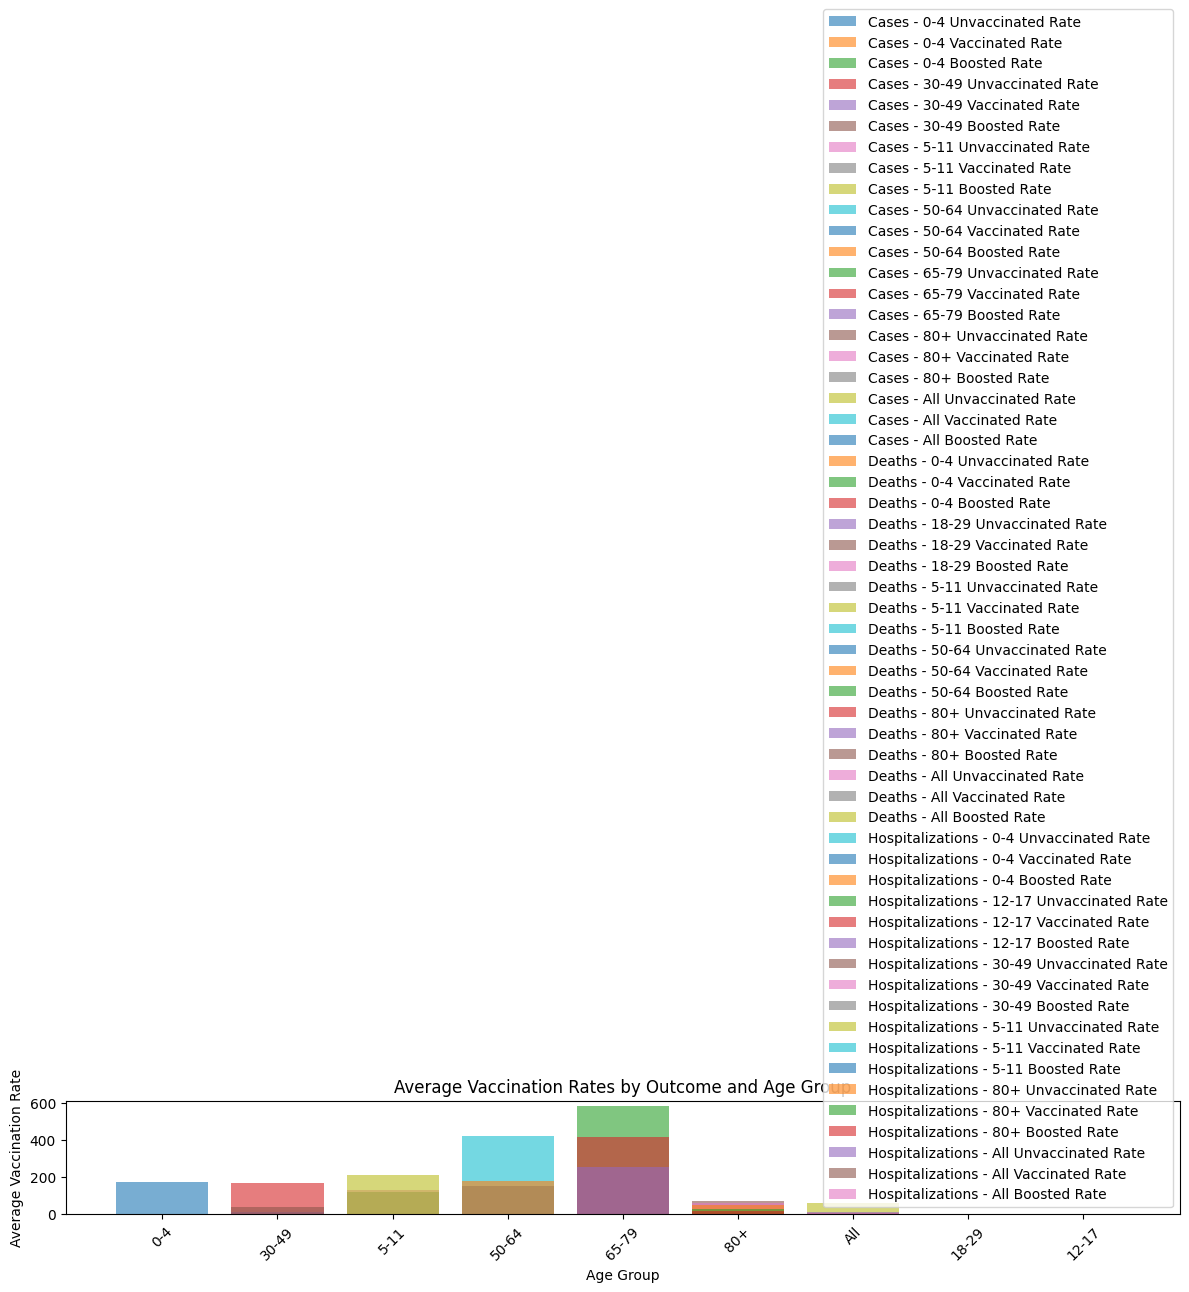

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일을 불러오는 코드
# CSV 파일 경로를 지정해주세요. 예: 'data.csv'
df = pd.read_csv('COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv')

# 날짜형으로 변환
df['Week End'] = pd.to_datetime(df['Week End'])

# Outcome 값이 'Cases', 'Deaths', 'Hospitalizations'인 데이터만 필터링
outcomes = ['Cases', 'Deaths', 'Hospitalizations']
filtered_df = df[df['Outcome'].isin(outcomes)]

# 예시 1: Outcome에 따른 연령대별 데이터 시각화 (전체 결과)
plt.figure(figsize=(10,6))

for outcome in outcomes:
    outcome_df = filtered_df[filtered_df['Outcome'] == outcome]
    # 연령대별로 시각화
    for age_group in outcome_df['Age Group'].unique():
        age_group_df = outcome_df[outcome_df['Age Group'] == age_group]
        plt.plot(age_group_df['Week End'], age_group_df['Unvaccinated Rate'], label=f"{outcome} - {age_group} Unvaccinated Rate")
        plt.plot(age_group_df['Week End'], age_group_df['Vaccinated Rate'], label=f"{outcome} - {age_group} Vaccinated Rate")
        plt.plot(age_group_df['Week End'], age_group_df['Boosted Rate'], label=f"{outcome} - {age_group} Boosted Rate")

plt.xlabel('Week End')
plt.ylabel('Rates')
plt.title('Vaccination Rates over Time by Outcome and Age Group')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 예시 2: 각 Outcome의 연령대별 인구 수 변화 시각화
plt.figure(figsize=(10,6))

for outcome in outcomes:
    outcome_df = filtered_df[filtered_df['Outcome'] == outcome]
    for age_group in outcome_df['Age Group'].unique():
        age_group_df = outcome_df[outcome_df['Age Group'] == age_group]
        plt.plot(age_group_df['Week End'], age_group_df['Population Unvaccinated'], label=f"{outcome} - {age_group} Unvaccinated Pop")
        plt.plot(age_group_df['Week End'], age_group_df['Population Vaccinated'], label=f"{outcome} - {age_group} Vaccinated Pop")
        plt.plot(age_group_df['Week End'], age_group_df['Population Boosted'], label=f"{outcome} - {age_group} Boosted Pop")

plt.xlabel('Week End')
plt.ylabel('Population')
plt.title('Population by Vaccination Status over Time by Outcome and Age Group')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 예시 3: Outcome별, 연령대별로 각 비율의 평균 시각화
mean_rates = filtered_df.groupby(['Outcome', 'Age Group']).agg({
    'Unvaccinated Rate': 'mean',
    'Vaccinated Rate': 'mean',
    'Boosted Rate': 'mean'
}).reset_index()

plt.figure(figsize=(12,8))

for outcome in outcomes:
    outcome_df = mean_rates[mean_rates['Outcome'] == outcome]
    for age_group in outcome_df['Age Group'].unique():
        age_group_df = outcome_df[outcome_df['Age Group'] == age_group]
        plt.bar(age_group_df['Age Group'], age_group_df['Unvaccinated Rate'], alpha=0.6, label=f"{outcome} - {age_group} Unvaccinated Rate")
        plt.bar(age_group_df['Age Group'], age_group_df['Vaccinated Rate'], alpha=0.6, label=f"{outcome} - {age_group} Vaccinated Rate")
        plt.bar(age_group_df['Age Group'], age_group_df['Boosted Rate'], alpha=0.6, label=f"{outcome} - {age_group} Boosted Rate")

plt.xlabel('Age Group')
plt.ylabel('Average Vaccination Rate')
plt.title('Average Vaccination Rates by Outcome and Age Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
